In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
from matplotlib import image;
from sklearn import preprocessing;
from sklearn.tree import DecisionTreeClassifier;
from sklearn import metrics;
from sklearn.model_selection import train_test_split;
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier;
import seaborn as sns;
from matplotlib.colors import ListedColormap;
from sklearn import svm;
from sklearn.naive_bayes import GaussianNB;
from sklearn.ensemble import AdaBoostClassifier;
from sklearn.preprocessing import StandardScaler;

In [2]:
df = pd.read_csv("hw2_Q5.txt", names = ["sepal_length", "sepal_width", "petal_length", "petal_width","Y"], header = None)

## Q5-a

Image for Setosa


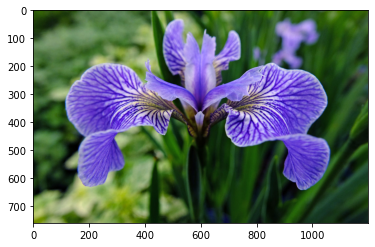

In [3]:
Setosa = image.imread("Setosa.jpg")
print("Image for Setosa")
plt.imshow(Setosa)
plt.show()

Image for Versicolor


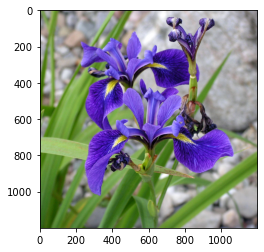

In [4]:
Versicolor = image.imread("Versicolor.jpg")
print("Image for Versicolor")
plt.imshow(Versicolor)
plt.show()

Image for Virginica


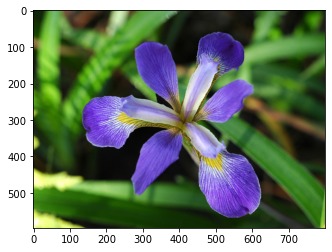

In [5]:
Virginica = image.imread("Virginica.jpg")
print("Image for Virginica")
plt.imshow(Virginica)
plt.show()

## Q5-b

In [6]:
#X1 and Y
print(np.corrcoef(df.sepal_length, df.Y))

[[1.         0.78256123]
 [0.78256123 1.        ]]


In [7]:
#X2 and Y
print(np.corrcoef(df.sepal_width, df.Y))

[[ 1.        -0.4194462]
 [-0.4194462  1.       ]]


In [8]:
#X3 and Y
print(np.corrcoef(df.petal_length, df.Y))

[[1.         0.94904254]
 [0.94904254 1.        ]]


In [9]:
#X4 and Y
print(np.corrcoef(df.petal_width, df.Y))

[[1.         0.95646382]
 [0.95646382 1.        ]]


I would discard X2, which is the sepal width first, since it possesses the lowest correlation coefficient with Y among the
fou features

## Q5-C

In [10]:
d = preprocessing.normalize(df)
scaled_df = pd.DataFrame(d, columns = ["sepal_length", "sepal_width", "petal_length", "petal_width","Y"])
scaled_df.head()

,sepal_length,sepal_width,petal_length,petal_width,Y
0,0.782195,0.286805,0.521463,0.130366,0.130366
1,0.784175,0.566349,0.246870,0.058087,0.000000
2,0.701740,0.309591,0.567584,0.216714,0.206394
3,0.736397,0.329730,0.549550,0.186847,0.109910
4,0.775771,0.607125,0.168646,0.033729,0.000000


scatter plot for X1 X3


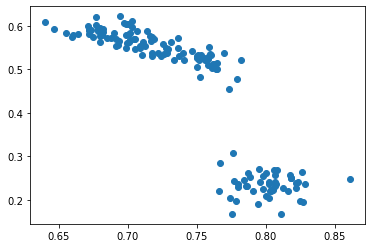

In [11]:
print("scatter plot for X1 X3")
plt.scatter(x = scaled_df.sepal_length, y = scaled_df.petal_length)

scatter plot for X1 X4


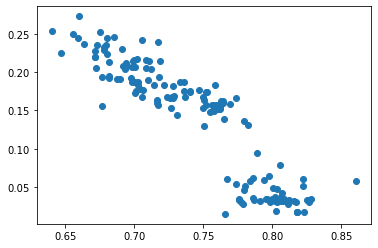

In [12]:
print("scatter plot for X1 X4")
plt.scatter(x = scaled_df.sepal_length, y = scaled_df.petal_width)

scatter plot for X3 X4


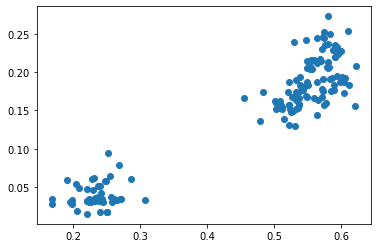

In [13]:
print("scatter plot for X3 X4")
plt.scatter(x = scaled_df.petal_length, y = scaled_df.petal_width)

The three different classes are linearly separable.

## Q5-d

### decison tree on X1, X3

In [14]:
X = df.loc[:,['sepal_length','petal_length']]
Y = df.loc[:,'Y']

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [16]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)

In [17]:
print(f'Accuracy for decision tree classifier between X1 and X3 is: {metrics.accuracy_score(Y_test, Y_pred):0.3f}')

Accuracy for decision tree classifier between X1 and X3 is: 0.911


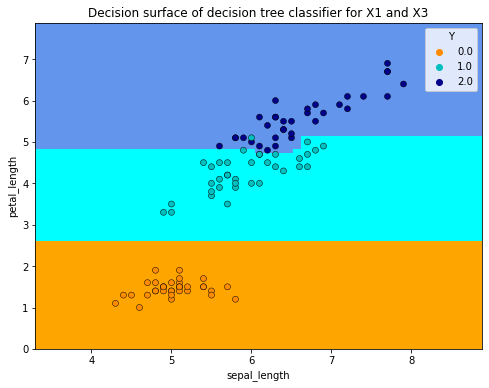

In [18]:
h = 0.02
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]
x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)
sns.scatterplot(
        x=X_train.iloc[:, 0],
        y=X_train.iloc[:, 1],
        hue=Y_train,
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Decision surface of decision tree classifier for X1 and X3")
plt.xlabel("sepal_length")
plt.ylabel('petal_length')

plt.show()

### KNN for X1, X3

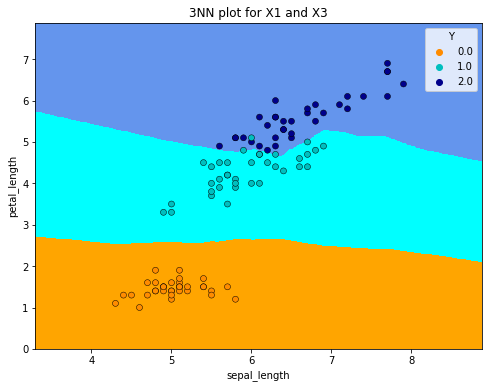

Accuracy for KNN classifier for X1 and X3 is: 0.911


In [19]:
# we create an instance of Neighbours Classifier and fit the data.
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, Y_train)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
sns.scatterplot(
    x=X_train.iloc[:, 0],
    y=X_train.iloc[:, 1],
    hue=Y_train,
    palette=cmap_bold,
    alpha=1.0,
    edgecolor="black",
)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3NN plot for X1 and X3")
plt.xlabel("sepal_length")
plt.ylabel('petal_length')

plt.show()
Y_pred = clf.predict(X_test)
print(f'Accuracy for KNN classifier for X1 and X3 is: {metrics.accuracy_score(Y_test, Y_pred):0.3f}')

### SVM for X1, X3

In [20]:
clf = svm.SVC(gamma = 2, C = 1)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

In [21]:
print(f'Accuracy for SVM classifier for X1 and X3 is: {metrics.accuracy_score(Y_test, Y_pred):0.3f}')

Accuracy for SVM classifier for X1 and X3 is: 0.933


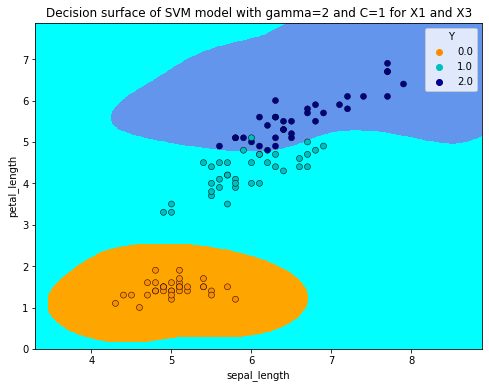

In [22]:
x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)
sns.scatterplot(
        x=X_train.iloc[:, 0],
        y=X_train.iloc[:, 1],
        hue=Y_train,
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Decision surface of SVM model with gamma=2 and C=1 for X1 and X3")
plt.xlabel("sepal_length")
plt.ylabel('petal_length')

plt.show()

### Naive Bayers Classifier for X1, X3

In [23]:
clf = GaussianNB()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

In [24]:
print(f'Accuracy for Naive Bayers classifier for X1 and X3 is: {metrics.accuracy_score(Y_test, Y_pred):0.3f}')

Accuracy for Naive Bayers classifier for X1 and X3 is: 0.889


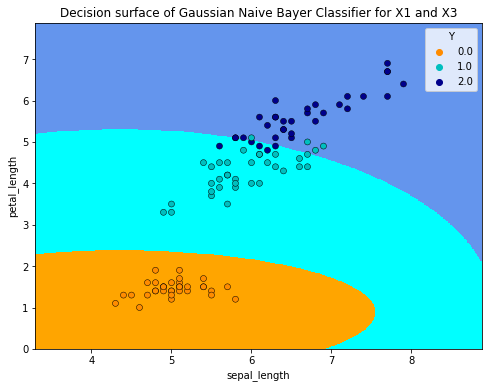

In [25]:
x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)
sns.scatterplot(
        x=X_train.iloc[:, 0],
        y=X_train.iloc[:, 1],
        hue=Y_train,
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Decision surface of Gaussian Naive Bayer Classifier for X1 and X3")
plt.xlabel("sepal_length")
plt.ylabel('petal_length')

plt.show()

### Adaboost Classifier with Decision Tree for X1, X4

In [26]:
clf = DecisionTreeClassifier(max_depth = 3)
abc =AdaBoostClassifier(n_estimators=30, base_estimator=clf)

In [27]:
abc.fit(X_train, Y_train)
Y_pred = abc.predict(X_test)
print(f'Accuracy for Adaboost Classifier with Decision Tree for X1 and X3 is: {metrics.accuracy_score(Y_test, Y_pred):0.3f}')

Accuracy for Adaboost Classifier with Decision Tree for X1 and X3 is: 0.933


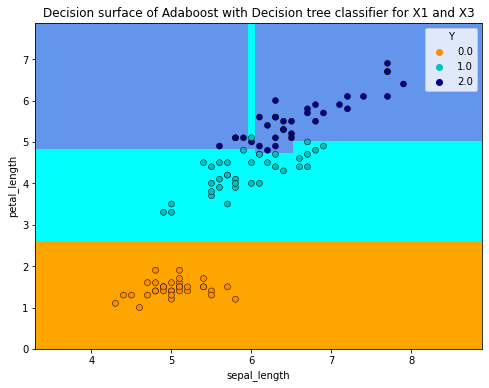

In [28]:
x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = abc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)
sns.scatterplot(
        x=X_train.iloc[:, 0],
        y=X_train.iloc[:, 1],
        hue=Y_train,
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Decision surface of Adaboost with Decision tree classifier for X1 and X3")
plt.xlabel("sepal_length")
plt.ylabel('petal_length')

plt.show()

### decison tree on X1, X4

In [29]:
X = df.loc[:,['sepal_length','petal_width']]
Y = df.loc[:,'Y']

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [31]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)

In [32]:
print(f'Accuracy for decision tree classifier between X1 and X4 is: {metrics.accuracy_score(Y_test, Y_pred):0.3f}')

Accuracy for decision tree classifier between X1 and X4 is: 0.911


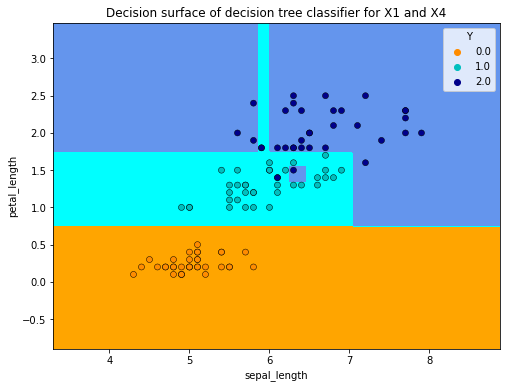

In [33]:
h = 0.02
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]
x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)
sns.scatterplot(
        x=X_train.iloc[:, 0],
        y=X_train.iloc[:, 1],
        hue=Y_train,
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Decision surface of decision tree classifier for X1 and X4")
plt.xlabel("sepal_length")
plt.ylabel('petal_length')

plt.show()

### KNN for X1, X4

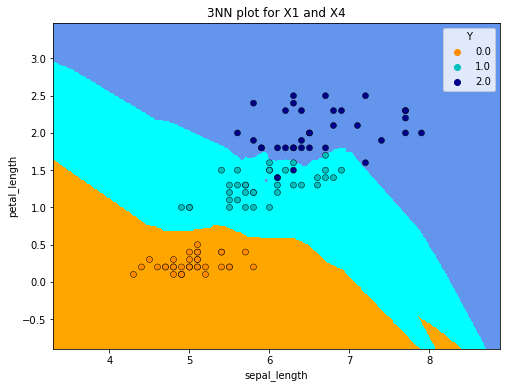

Accuracy for KNN classifier for X1 and X4 is: 0.978


In [34]:
# we create an instance of Neighbours Classifier and fit the data.
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, Y_train)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
sns.scatterplot(
    x=X_train.iloc[:, 0],
    y=X_train.iloc[:, 1],
    hue=Y_train,
    palette=cmap_bold,
    alpha=1.0,
    edgecolor="black",
)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3NN plot for X1 and X4")
plt.xlabel("sepal_length")
plt.ylabel('petal_length')

plt.show()
Y_pred = clf.predict(X_test)
print(f'Accuracy for KNN classifier for X1 and X4 is: {metrics.accuracy_score(Y_test, Y_pred):0.3f}')

### SVM for X1, X4

In [35]:
clf = svm.SVC(gamma = 2, C = 1)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

In [36]:
print(f'Accuracy for SVM classifier for X1 and X4 is: {metrics.accuracy_score(Y_test, Y_pred):0.3f}')

Accuracy for SVM classifier for X1 and X4 is: 0.978


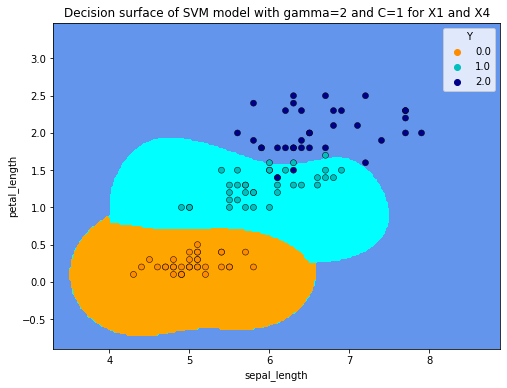

In [37]:
x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)
sns.scatterplot(
        x=X_train.iloc[:, 0],
        y=X_train.iloc[:, 1],
        hue=Y_train,
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Decision surface of SVM model with gamma=2 and C=1 for X1 and X4")
plt.xlabel("sepal_length")
plt.ylabel('petal_length')

plt.show()

### Naive Bayers Classifier for X1, X4

In [38]:
clf = GaussianNB()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

In [39]:
print(f'Accuracy for Naive Bayers classifier for X1 and X4 is: {metrics.accuracy_score(Y_test, Y_pred):0.3f}')

Accuracy for Naive Bayers classifier for X1 and X4 is: 0.978


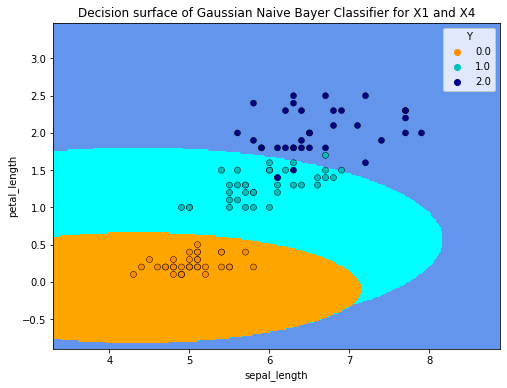

In [40]:
x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)
sns.scatterplot(
        x=X_train.iloc[:, 0],
        y=X_train.iloc[:, 1],
        hue=Y_train,
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Decision surface of Gaussian Naive Bayer Classifier for X1 and X4")
plt.xlabel("sepal_length")
plt.ylabel('petal_length')

plt.show()

### Adaboost Classifier with Decision Tree for X1, X4

In [41]:
clf = DecisionTreeClassifier(max_depth = 3)
abc =AdaBoostClassifier(n_estimators=30, base_estimator=clf)

In [42]:
abc.fit(X_train, Y_train)
Y_pred = abc.predict(X_test)
print(f'Accuracy for Adaboost Classifier with Decision Tree for X1 and X4 is: {metrics.accuracy_score(Y_test, Y_pred):0.3f}')

Accuracy for Adaboost Classifier with Decision Tree for X1 and X4 is: 0.956


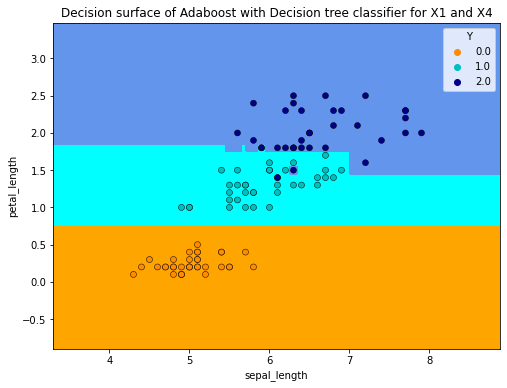

In [43]:
x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = abc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)
sns.scatterplot(
        x=X_train.iloc[:, 0],
        y=X_train.iloc[:, 1],
        hue=Y_train,
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Decision surface of Adaboost with Decision tree classifier for X1 and X4")
plt.xlabel("sepal_length")
plt.ylabel('petal_length')

plt.show()

### decison tree on X3, X4

In [44]:
X = df.loc[:,['petal_length','petal_width']]
Y = df.loc[:,'Y']

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [46]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)

In [47]:
print(f'Accuracy for decision tree classifier between X3 and X4 is: {metrics.accuracy_score(Y_test, Y_pred):0.3f}')

Accuracy for decision tree classifier between X3 and X4 is: 0.956


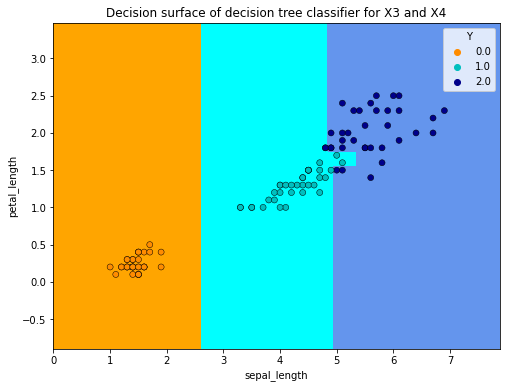

In [48]:
h = 0.02
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]
x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)
sns.scatterplot(
        x=X_train.iloc[:, 0],
        y=X_train.iloc[:, 1],
        hue=Y_train,
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Decision surface of decision tree classifier for X3 and X4")
plt.xlabel("sepal_length")
plt.ylabel('petal_length')

plt.show()

### KNN for X3, X4

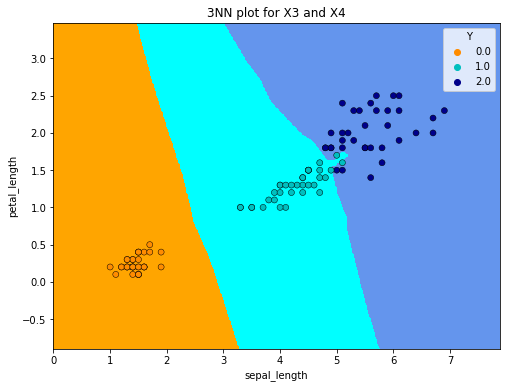

Accuracy for KNN classifier for X3 and X4 is: 0.978


In [49]:
# we create an instance of Neighbours Classifier and fit the data.
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, Y_train)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
sns.scatterplot(
    x=X_train.iloc[:, 0],
    y=X_train.iloc[:, 1],
    hue=Y_train,
    palette=cmap_bold,
    alpha=1.0,
    edgecolor="black",
)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3NN plot for X3 and X4")
plt.xlabel("sepal_length")
plt.ylabel('petal_length')

plt.show()
Y_pred = clf.predict(X_test)
print(f'Accuracy for KNN classifier for X3 and X4 is: {metrics.accuracy_score(Y_test, Y_pred):0.3f}')

### SVM for X3, X4

In [50]:
clf = svm.SVC(gamma = 2, C = 1)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

In [51]:
print(f'Accuracy for SVM classifier for X3 and X4 is: {metrics.accuracy_score(Y_test, Y_pred):0.3f}')

Accuracy for SVM classifier for X3 and X4 is: 0.978


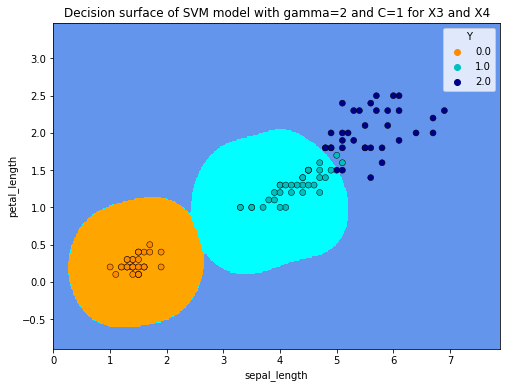

In [52]:
x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)
sns.scatterplot(
        x=X_train.iloc[:, 0],
        y=X_train.iloc[:, 1],
        hue=Y_train,
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Decision surface of SVM model with gamma=2 and C=1 for X3 and X4")
plt.xlabel("sepal_length")
plt.ylabel('petal_length')

plt.show()

### Naive Bayers Classifier for X3, X4

In [53]:
clf = GaussianNB()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

In [54]:
print(f'Accuracy for Naive Bayers classifier for X3 and X4 is: {metrics.accuracy_score(Y_test, Y_pred):0.3f}')

Accuracy for Naive Bayers classifier for X3 and X4 is: 0.978


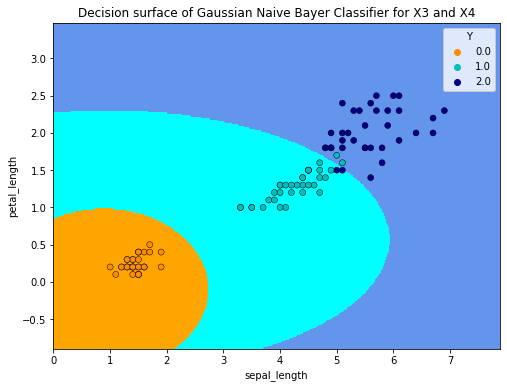

In [55]:
x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)
sns.scatterplot(
        x=X_train.iloc[:, 0],
        y=X_train.iloc[:, 1],
        hue=Y_train,
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Decision surface of Gaussian Naive Bayer Classifier for X3 and X4")
plt.xlabel("sepal_length")
plt.ylabel('petal_length')

plt.show()

### Adaboost Classifier with Decision Tree for X3, X4

In [56]:
clf = DecisionTreeClassifier(max_depth = 3)
abc =AdaBoostClassifier(n_estimators=30, base_estimator=clf)

In [57]:
abc.fit(X_train, Y_train)
Y_pred = abc.predict(X_test)
print(f'Accuracy for Adaboost Classifier with Decision Tree for X3 and X4 is: {metrics.accuracy_score(Y_test, Y_pred):0.3f}')

Accuracy for Adaboost Classifier with Decision Tree for X3 and X4 is: 0.956


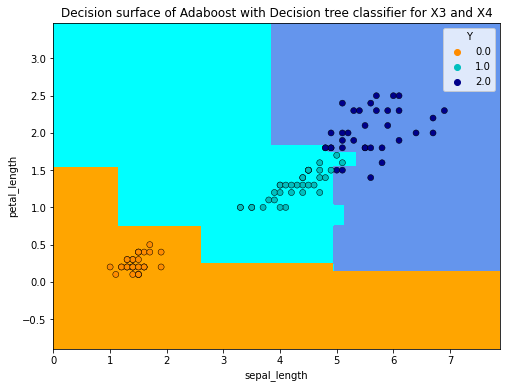

In [58]:
x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = abc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)
sns.scatterplot(
        x=X_train.iloc[:, 0],
        y=X_train.iloc[:, 1],
        hue=Y_train,
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Decision surface of Adaboost with Decision tree classifier for X3 and X4")
plt.xlabel("sepal_length")
plt.ylabel('petal_length')

plt.show()

## Q5-d

Decision Tree Classifier's advantage is its interpretability and that there is no need for feature scaling. Also, decision tree classifier works on both linear and nonlinear problems.

Decision Tree Classifier's disadvantage is its poor results on very small datasets. Also, overfitting can easily occur.

K Nearest Neighbours Classifier's advantage is that it's simple to understand, fast and efficient.

K Nearest Neighbours Classifier's advantage is that we need to manually choose the number of neighbours ‘k’.

SVM's advantage is its high performance on nonlinear problems. And it's not biased by outliers. It is alsp not sensitive to overfitting.

SVM's disadvantage is that it is not the best choice for large number of features. And it's often more complex.

Naive Bayers Classifier's advantage is that it's efficient. And it's not biased by outliers. It works on nonlinear problems and it's a probabilistic approach.

Naive Bayers Classifier's disadvantage is that it's based in the assumption that the features have same statistical relevance.

Adaboost classifier's advantage is that it is easier to use with less need for tweaking parameters unlike algorithms like SVM.

Adaboost Classifier's disadvantage is that boosting technique learns progressively, it is important to ensure that you have quality data. AdaBoost is also extremely sensitive to Noisy data and outliers so if you do plan to use AdaBoost then it is highly recommended to eliminate them.